In [1]:
import pandas as pd
import numpy as np

In [7]:
hpi = pd.DataFrame(pd.read_csv('../data/hpi_final.csv'))
cpb = pd.DataFrame(pd.read_csv('../data/cpb_final.csv'))
bps = pd.DataFrame(pd.read_csv('../data/building_permits_final.csv'))
pop = pd.DataFrame(pd.read_csv('../data/Population_Change.csv'))
inc = pd.DataFrame(pd.read_csv('../data/county_income.csv'))
comp = pd.DataFrame(pd.read_csv('../data/complete_census.csv'))
hpi2 = pd.DataFrame(pd.read_csv('../data/hpi_final2.csv'))

C:\Users\nilay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
pop = pop[['pop_chg_yoy','Id2', 'year','one_year', 'two_years', 'three_years', 'four_years', 'five_years']]

pop.one_year = pop.one_year
pop.two_years = pop.two_years
pop.three_years = pop.three_years
pop.four_years = pop.four_years
pop.five_years = pop.five_years
pop = pop.rename(columns = {
    'Id2': 'county_code',
    'one_year': 'one_year_pop',
    'two_years': 'two_years_pop',
    'three_years': 'three_years_pop',
    'four_years': 'four_years_pop',
    'five_years': 'five_years_pop'
})
inc = inc[['county_code', 'year', 'hh_income']]

gb = inc.groupby(['county_code', 'year']).mean()


def percent_change(gb):
    gb['one_year_inc']=gb['hh_income'].pct_change(periods=1)
    gb['two_years_inc']=gb['hh_income'].pct_change(periods=2)
    gb['three_years_inc']=gb['hh_income'].pct_change(periods=3)
    gb['four_years_inc']=gb['hh_income'].pct_change(periods=4)
    gb['five_years_inc']=gb['hh_income'].pct_change(periods=5)
    
    return gb

inc = gb.groupby(level=0).apply(percent_change)

hpi2 = hpi2.rename(columns = {
    'one_year': 'previous_one',
    'two_years': 'previous_two',
    'three_years': 'previous_three',
    'four_years': 'previous_four',
    'five_years': 'previous_five',
    'county': 'county_code'
})

hpi = hpi[['county', 'year', 'hpi','one_year', 'two_years', 'three_years',
       'four_years', 'five_years'
          ]].rename(columns={'county': 'county_code'})

bps = bps[['date', 'county_code', 'single_units', 'total_units']].rename(columns={'date': 'year'})


In [9]:
df = pd.merge(hpi, cpb, how='inner', on=['county_code', 'year'])

df1 = pd.merge(df, bps, how='inner', on=['county_code', 'year'])

del df

df2 = pd.merge(df1, pop, how='inner', on = ['county_code', 'year'])

del df1

df3 = pd.merge(df2, inc.reset_index(), how="inner", on = ['county_code', 'year'])

del df2

df4 = pd.merge(df3, hpi2, how='inner', on=['county_code', 'year'])

del df3

df5 = pd.merge(df4, comp, how = 'inner', on=['county_code','year'])

del df4

del cpb
del bps
del pop
del inc
del comp

df5.head()

,county_code,year,hpi_x,one_year,two_years,three_years,four_years,five_years,EMP,ESTAB,...,ten19_units,tenure,three4_units,three_rooms,twenty49_units,two_rooms,two_units,under_18,units_total,vacant
0,10001,2010,162.912258,-0.066988,-0.093230,-0.094294,-0.079433,-0.055848,46405,3200,...,2690,57396,1144,12635,940,3992,752,39683,63563,6167
1,10001,2011,151.999032,-0.028126,-0.029266,-0.013338,0.011940,0.075964,48100,3177,...,2777,57629,1162,12421,985,4045,953,40050,64616,6987
2,10001,2012,147.723871,-0.001173,0.015216,0.041226,0.107103,0.113881,47883,3119,...,2997,57816,1202,12507,1102,4241,825,40375,65394,7578
3,10001,2013,147.550645,0.016408,0.042448,0.108403,0.115188,0.156970,48071,3166,...,2836,58524,1323,12781,1104,4009,836,40384,65924,7400
4,10001,2014,149.971613,0.025620,0.090510,0.097186,0.138293,NaN,49311,3263,...,3054,59142,1289,13164,1144,3627,773,40488,66652,7510


In [41]:
df5.to_csv('model_data.csv')

In [10]:
hpi_combined = pd.merge(hpi, hpi2, on=['county_code', 'year'], how='inner')

hpi_combined = hpi_combined[['one_year', 'two_years', 'three_years', 'four_years','five_years',
                            'previous_one', 'previous_two','previous_three','previous_four','previous_five']].dropna()

In [11]:
hpi_combined['five_years'] = (1+hpi_combined['five_years']) **(1/5) -1
hpi_combined['four_years'] = (1+hpi_combined['four_years']) **(1/4)-1
hpi_combined['three_years'] = (1+hpi_combined['three_years']) **(1/3)-1
hpi_combined['two_years'] = (1+hpi_combined['two_years']) **(1/2)-1

hpi_combined['previous_five'] = (1+hpi_combined['previous_five']) **(1/5) -1
hpi_combined['previous_four'] = (1+hpi_combined['previous_four']) **(1/4)-1
hpi_combined['previous_three'] = (1+hpi_combined['previous_three']) **(1/3)-1 
hpi_combined['previous_two'] = (1+hpi_combined['previous_two']) **(1/2)-1


In [12]:
hpi_combined.head()

,one_year,two_years,three_years,four_years,five_years,previous_one,previous_two,previous_three,previous_four,previous_five
5,-0.064977,-0.033519,-0.026425,-0.016422,-0.011177,-0.010235,0.004309,0.023603,0.033176,0.037961
6,-0.001003,-0.006557,0.000317,0.002750,0.006541,-0.064977,-0.037995,-0.019339,0.000701,0.012754
7,-0.012079,0.000977,0.004004,0.008436,0.007261,-0.001003,-0.033519,-0.025819,-0.014787,0.000360
8,0.014206,0.012143,0.015369,0.012156,0.011108,-0.012079,-0.006557,-0.026425,-0.022402,-0.014246
9,0.010084,0.015952,0.011473,0.010335,0.013077,0.014206,0.000977,0.000317,-0.016422,-0.015188


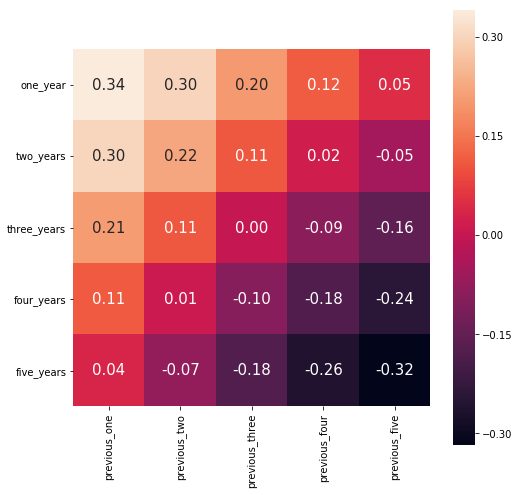

In [13]:
# Calculate and show correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns


cor = hpi_combined.corr()
%matplotlib inline
# cm = np.corrcoef(df5.values)
# sns.set(font_scale=1.5)
hm = sns.heatmap(cor[['previous_one', 'previous_two', 'previous_three','previous_four','previous_five']].loc[['one_year','two_years','three_years','four_years','five_years']],
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15})



fig = plt.gcf()
fig.set_size_inches( 8, 8)

plt.savefig('../plots_and_figures/five_year_corr_matrix.png')

plt.show()
